In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import torch

from train import TrainingExperiment
from dataset import build_dataset_out_of_dir_structure, get_data_loaders
from models import Model1Vgg19, ModelTinyHruz



IMG_DIR = 'total_data_CNN03'

# load dataset to memory
imgs, labls, labls_2_id = build_dataset_out_of_dir_structure(Path(IMG_DIR))


A28 loaded
IP18c loaded
IS6a loaded
IS10abcde loaded
E8a loaded
B30 loaded
A6a loaded
P3 loaded
IP27a loaded
B16 loaded
Z4b loaded
IJ4a loaded
B17 loaded
IS9abcde loaded
IP3 loaded
IJ13 loaded
B8 loaded
IP25a loaded
E3ab loaded
E1 loaded
IJ9 loaded
A15 loaded
IS19bd loaded
IJ4b loaded
E2c loaded
C8b loaded
C11a loaded
G4 loaded
A3 loaded
A25 loaded
E7a loaded
IP31a loaded
IP20a loaded
IJ14c loaded
A23 loaded
C4c loaded
IJ11a loaded
IJ3 loaded
IP28a loaded
C7a loaded
A7b loaded
IP15b loaded
B22a loaded
C7b loaded
IJ1 loaded
B7 loaded
IS16bcd loaded
IS4bd loaded
B26 loaded
E10 loaded
A24 loaded
C2e loaded
IJ4cde loaded
A31b loaded
B24b loaded
A14 loaded
B34 loaded
C2a loaded
C6a loaded
IJ12 loaded
E4 loaded
Z9 loaded
IS22abcdef loaded
C1 loaded
C4b loaded
IS12a loaded
A8 loaded
A29 loaded
IP6 loaded
A16 loaded
IP9 loaded
IP14a loaded
IS8ab loaded
B33 loaded
IP26a loaded
IS20 loaded
C6b loaded
C8a loaded
A5a loaded
P2 loaded
E8e loaded
IJ14a loaded
IP28 loaded
B9 loaded
C5a loaded
IS15b l

In [2]:
RESIZE_TO = (128,128)
BATCH_SIZE = 4

# dataloaders
train_data, test_data, val_data = get_data_loaders(imgs, labls, labls_2_id, 
                                                   batch_size=BATCH_SIZE, resize_to=RESIZE_TO)

data split; train:21656, test:2707, val:2707


Starting training of ModelTinyHruz(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(4, 4), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc4): Linear(in_features=445568, out_features=254, bias=True)
), using device cuda:0
epoch: 0


0it [00:00, ?it/s]/home/tomas/miniconda3/envs/mmdet/lib/python3.8/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
5414it [05:03, 17.83it/s]


train loss: 5289.087668224396


677it [00:10, 62.43it/s]


val loss: 217.50867299822232
epoch: 1


5414it [05:04, 17.77it/s]


train loss: 786.0009288886008


677it [00:10, 65.35it/s]


val loss: 180.46452720078736
epoch: 2


5414it [04:59, 18.08it/s]


train loss: 334.63356030666927


677it [00:11, 60.41it/s]


val loss: 198.1513918237418
epoch: 3


5414it [05:03, 17.81it/s]


train loss: 143.64687601557955


677it [00:10, 63.91it/s]


val loss: 199.76917099625942
epoch: 4


5414it [05:03, 17.85it/s]


train loss: 103.46536502754522


677it [00:10, 65.21it/s]


val loss: 194.79682578794126
epoch: 5


5414it [05:02, 17.91it/s]


train loss: 63.618814137465


677it [00:10, 61.72it/s]


val loss: 195.9283381363513
epoch: 6


5414it [05:09, 17.48it/s]


train loss: 30.581625711622216


677it [00:10, 64.00it/s]


val loss: 188.4865062449748
epoch: 7


5414it [05:08, 17.57it/s]


train loss: 36.22095278448699


677it [00:10, 62.28it/s]


val loss: 185.34672655288162
epoch: 8


5414it [05:04, 17.81it/s]


train loss: 6.024982757266699


677it [00:10, 63.42it/s]


val loss: 201.44459887197672
epoch: 9


5414it [05:01, 17.96it/s]


train loss: 1.0638875666548895


677it [00:10, 63.73it/s]


val loss: 190.2381764660601
training finished after 10 iterations


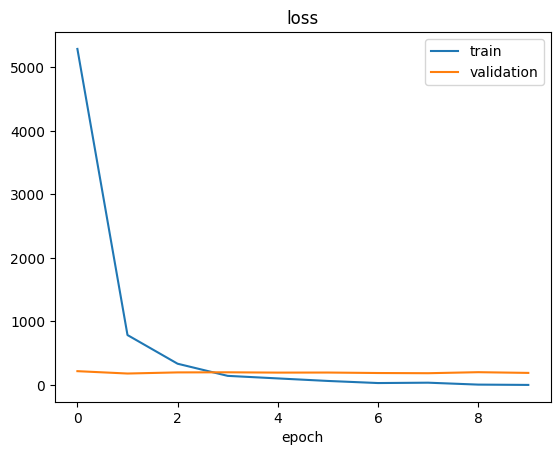

In [3]:
net = ModelTinyHruz(num_out_classes=len(labls_2_id), img_size=RESIZE_TO)

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.002)

tr = TrainingExperiment(net, loss, train_data, val_data=val_data)
tr.train(optimizer, 10)
tr.plot_loss()